# An Introduction to Python, Jupyter, and Pandas

<b>Python</b> is a general programming language that is relatively easy to pick-up (versus say Java) and used to build web applications, develop software, and increasingly, analyze data through scientific computing packages. Similar to R, Python has some base computing capabilities built in, but you'll need to call Python packages for more advanced functions and procedures. The big difference between R and Python is that R is a complete 'ecosystem' for statistical computing, housing nearly all statistical methods that exist today. Python has historically not been as statistics-oriented, but the software is catching up to the capabilities that exist in R.

A <b>Jupyter Notebook</b> is a server-client application that allows real-time programming and editing of documents via a web browser. Specifically, you can connect a 'kernel' to exectute code for nearly any language through a Jupyter Notebook. A kernel is a software engine that operates on the backend of the notebook, and runs code blocks for the particularly language you are working with (similar to R Markdown for R). The ipython kernel, for instance, executes only Python code.

<b>Pandas</b> is a Python package that provides fast, flexible, and expressive data structures, designed to make working with complicated data easy and intuitive. Many have called Pandas a "breakthrough" in statistical computing for Python, and this package has built upon previously exisiting Python scientific packages (e.g. NumPy and SciPy) to increase its capabilities. Pandas comes as part of the Anaconda install, or you can download it separately (although I'd recommend you use the Anaconda distribution).   

## Tutorial Today

I am assuming you have Python, Jupyter, and Anaconda applications already installed. If not, follow the directions here:
http://jupyter.readthedocs.org/en/latest/install.html#new-to-python-and-jupyter

This Jupyter Notebook is available on my github account for download. Link here: https://github.com/sgille3/INFO511

Parts of this demo have been borrowed from: https://github.com/jonathanrocher/pandas_tutorial.
Much more information exists at this location and elsewhere around the internet. The remaining portion of the demo considers Homework 1 for this course.

## Demo Part 1

We are going to load a few public datasets containing information about global temperature, sea level infomation, and  concentrations of greenhouse gases to evaluate for various trends. We will download the datasets (available on my github), visualize them, clean them, and summarize them.

Goals for the demo:
    1. Loading data
    2. Pandas datastructures
    3. Cleaning and formatting data
    4. Basic visualization
    5. Statistical analysis

## Loading Packages (Each of these packages come as part of the Anaconda install)

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from pandas import set_option
set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)

On occasion, packages affiliated with Pandas (dependencies) will be updated and you'll get warnings that Pandas will not load until the particular package on your local machine gets updated. You update packages through a command prompt using the code: `conda update <package>`

In [2]:
# Change this cell to the demo location on YOUR machine
%cd ~/Projects/Course Work/INFO 511 - Analytics/Python Presentation/Data/

C:\Users\sgille3\Projects\Course Work\INFO 511 - Analytics\Python Presentation\Data


## 1. Loading data

More details, see http://pandas.pydata.org/pandas-docs/stable/io.html

To find all reading functions in pandas, ask ipython's tab completion:

In [ ]:
pd.read_table #pd.read_<tab> to get all the options

In [ ]:
pd.read_table?

### From a local text file

In [3]:
filename = "temperatures/annual.land_ocean.90S.90N.df_1901-2000mean.dat"
full_globe_temp = pd.read_table(filename)
full_globe_temp.head(5)

,1880 -0.1591
0,1881 -0.0789
1,1882 -0.1313
2,1883 -0.1675
3,1884 -0.2485
4,1885 -0.2042


Lots of things wrong here...no seperator or column labels, a default index. Need more specification to make this data usable.

In [4]:
full_globe_temp = pd.read_table(filename, sep="\s+") #\s+ tells pandas to separate by spaces
full_globe_temp.head(5)

,1880,-0.1591
0,1881,-0.0789
1,1882,-0.1313
2,1883,-0.1675
3,1884,-0.2485
4,1885,-0.2042


There are columns but the column names are '1880' and '-0.1591' (i.e. takes the first row).

In [5]:
full_globe_temp = pd.read_table(filename, sep="\s+", names=["year", "mean_temp"])
full_globe_temp.head(5)

,year,mean_temp
0,1880,-0.1591
1,1881,-0.0789
2,1882,-0.1313
3,1883,-0.1675
4,1884,-0.2485


Since we only have 2 columns, one of which would be nicer to access the data (the year of the record), let's try using the `index_col` option:

In [6]:
full_globe_temp = pd.read_table(filename, sep="\s+", names=["year", "mean_temp"], 
                                index_col=0) 
full_globe_temp.head(5)

,mean_temp
year,
1880,-0.1591
1881,-0.0789
1882,-0.1313
1883,-0.1675
1884,-0.2485


Last step: the index is made of dates. Let's make that explicit:

In [7]:
full_globe_temp = pd.read_table(filename, sep="\s+", names=["year", "mean_temp"], 
                                index_col=0, parse_dates=True) 
                                ##Python thinks the year column is an integer
                                ##tell Python that year is a date so you can do timeseries
full_globe_temp.head(5)

,mean_temp
year,
1880-01-01,-0.1591
1881-01-01,-0.0789
1882-01-01,-0.1313
1883-01-01,-0.1675
1884-01-01,-0.2485


A second example:

In [8]:
giss_temp = pd.read_table("temperatures/GLB.Ts+dSST.txt", sep="\s+", skiprows=7,
                          skip_footer=11, engine="python")
giss_temp.head(50)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
5,1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
6,1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
7,1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year


### From a local or remote HTML file

To be able to grab more local data about mean sea levels, we can download and extract data about mean sea level stations around the world from the PSMSL (http://www.psmsl.org/). Again to download and parse all tables in a webpage, just give `read_html` the URL to parse:

In [9]:
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [10]:
local_sea_level_stations = table_list[0] #was an HTML file, now a Pandas object
                                         #[0] extracts all the information in the html object see (Pythons native code)
local_sea_level_stations.head(5)

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,06/10/2015,60,281
4,PAGO PAGO,539,-14.280,-170.690,144.0,ASM,08/03/2016,745,1


## 2. Pandas DataStructures

For more details, see http://pandas.pydata.org/pandas-docs/stable/dsintro.html

Now that we have used `read_**` functions to load datasets, we need to understand better what kind of objects we got from them to learn to work with them.

### DataFrame, the pandas 2D structure

In [11]:
# Type of the object?
type(giss_temp)

pandas.core.frame.DataFrame

In [12]:
# Internal nature of the object
print(giss_temp.shape) #143 rows; 20 cols
print(giss_temp.dtypes) #data types of objects inside the columns (object type...most general)

(143, 20)
Year      object
Jan       object
Feb       object
Mar       object
Apr       object
May       object
Jun       object
Jul       object
           ...  
Dec       object
J-D       object
D-N       object
DJF       object
MAM       object
JJA       object
SON       object
Year.1    object
dtype: object


In [13]:
giss_temp.index #tells you the index numbers...0,1,2,3 by default

RangeIndex(start=0, stop=143, step=1)

In [14]:
giss_temp.columns #lists columns out

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON',
       'Year.1'],
      dtype='object')

A lot of information at once including memory usage:

In [15]:
giss_temp.info() #recap of all information for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 20 columns):
Year      143 non-null object
Jan       143 non-null object
Feb       143 non-null object
Mar       143 non-null object
Apr       143 non-null object
May       143 non-null object
Jun       143 non-null object
Jul       143 non-null object
Aug       143 non-null object
Sep       143 non-null object
Oct       143 non-null object
Nov       143 non-null object
Dec       143 non-null object
J-D       143 non-null object
D-N       143 non-null object
DJF       143 non-null object
MAM       143 non-null object
JJA       143 non-null object
SON       143 non-null object
Year.1    143 non-null object
dtypes: object(20)
memory usage: 22.4+ KB


### Series, the pandas 1D structure

A series can be constructed with the `pd.Series` constructor (passing a list or array of values) or from a `DataFrame`, by extracting one of its columns.

In [16]:
type(full_globe_temp)

pandas.core.frame.DataFrame

In [17]:
full_globe_temp.columns #extract column names

Index(['mean_temp'], dtype='object')

In [20]:
full_globe_temp.head() #full_globe_temp.tail()

,mean_temp
year,
1880-01-01,-0.1591
1881-01-01,-0.0789
1882-01-01,-0.1313
1883-01-01,-0.1675
1884-01-01,-0.2485


Probably the most important attribute of a `Series` or `DataFrame` is its `index` since we will use that to, well, index into the structures to access te information:

In [21]:
full_globe_temp.index

DatetimeIndex(['1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01',
               ...
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name='year', length=131, freq=None)

## 3. Cleaning and formatting data

The datasets that we obtain straight from the reading functions are pretty raw. A lot of pre-processing can be done during data read but we haven't used all the power of the reading functions. Let's learn to do a lot of cleaning and formatting of the data.

The GISS temperature dataset has a lot of issues too: useless numerical index, redundant columns, useless rows, placeholder (`****`) for missing values, and wrong type for the columns. Let's fix all this:

### Renaming columns

In [22]:
# The columns of the local_sea_level_stations aren't clean: they contain spaces and dots.
local_sea_level_stations.columns

Index(['Station Name', 'ID', 'Lat.', 'Lon.', 'GLOSS ID  ', 'Country  ', 'Date',
       'Coastline  ', 'Station  '],
      dtype='object')

In [23]:
# Let's clean them up a bit:
local_sea_level_stations.columns = [name.strip().replace(".", "") 
                                    for name in local_sea_level_stations.columns]
local_sea_level_stations.columns

Index(['Station Name', 'ID', 'Lat', 'Lon', 'GLOSS ID', 'Country', 'Date',
       'Coastline', 'Station'],
      dtype='object')

### Setting missing values

In the full globe dataset, -999.00 was used to indicate that there was no value for that year. Let's search for all these values and replace them with the missing value that Pandas understand: `np.nan` 

In [24]:
full_globe_temp == -999.000 #returns T/F boolean where temp == -999

,mean_temp
year,
1880-01-01,False
1881-01-01,False
1882-01-01,False
1883-01-01,False
1884-01-01,False
1885-01-01,False
1886-01-01,False
1887-01-01,False
...,...


In [25]:
mask = full_globe_temp == -999.000 ##create a variable that identifies missing obs. (boolean mask)
full_globe_temp[mask] #print out missing obs

,mean_temp
year,
1880-01-01,NaN
1881-01-01,NaN
1882-01-01,NaN
1883-01-01,NaN
1884-01-01,NaN
1885-01-01,NaN
1886-01-01,NaN
1887-01-01,NaN
...,...


In [26]:
full_globe_temp[full_globe_temp == -999.000] = np.nan #np.nan is numpy nan...puts NaN for all values
                                                    #where full_globe_temp ==-999.000
full_globe_temp.tail()

,mean_temp
year,
2006-01-01,0.5601
2007-01-01,0.5472
2008-01-01,0.4804
2009-01-01,0.5551
2010-01-01,NaN


### Choosing what is the index

In [27]:
giss_temp #index is 0,1,2,3...

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
5,1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
6,1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
7,1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2009,56,48,49,57,59,62,66,61,64,58,72,58,59,59,52,55,63,65,2009


In [28]:
# We didn't set a column number of the index of giss_temp, we can do that afterwards:
giss_temp = giss_temp.set_index("Year")
giss_temp.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
Year,,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884


### Dropping rows and columns

In [29]:
# 1 column is redundant with the index: 
giss_temp.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON', 'Year.1'],
      dtype='object')

In [30]:
# Let's drop it:
giss_temp = giss_temp.drop("Year.1", axis=1) #.drop() looks at rows (i.e. index) by default
                                             #have to tell it to drop from columns with axis = 1 
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [31]:
# We can also just select the columns we want to keep:
giss_temp = giss_temp[[u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', 
                       u'Aug', u'Sep', u'Oct', u'Nov', u'Dec']]
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40
...,...,...,...,...,...,...,...,...,...,...,...,...


In [32]:
# Let's remove all these extra column names (Year  Jan ...). They all correspond to the index "Year"
giss_temp = giss_temp.drop("Year")
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40
...,...,...,...,...,...,...,...,...,...,...,...,...


Let's also set `****` to a real missing value (`np.nan`). We can often do it using a boolean mask, but that may trigger pandas warning. Another way to assign based on a boolean condition is to use the `where` method:

In [33]:
#giss_temp[giss_temp == "****"] = np.nan
giss_temp = giss_temp.where(giss_temp != "****", np.nan) #give giss_temp where values != "****"
                                                         #else np.nan

In [34]:
giss_temp.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011,45,44,57,60,47,54,70,69,52,60,50,48
2012,38,43,52,62,71,59,50,56,68,73,69,46
2013,62,52,60,48,56,61,53,61,73,61,75,61
2014,68,44,71,72,79,62,50,74,81,78,64,74
2015,75,80,84,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Changing dtype of series

Now that the sea levels are looking pretty good, let's got back to the GISS temperature dataset. Because of the labels (strings) found in the middle of the timeseries, every column only assumed to contain strings (didn't convert them to floating point values):

In [39]:
giss_temp.dtypes

Jan    float32
Feb    float32
Mar    float32
Apr    float32
May    float32
Jun    float32
Jul    float32
Aug    float32
Sep    float32
Oct    float32
Nov    float32
Dec    float32
dtype: object

That can be changed after the fact (and after the cleanup) with the `astype` method of a `Series`:

In [36]:
giss_temp["Jan"].astype("float32")

Year
1880   -34.0
1881   -13.0
1882     3.0
1883   -38.0
1884   -20.0
1885   -57.0
1886   -37.0
1887   -60.0
        ... 
2008    22.0
2009    56.0
2010    66.0
2011    45.0
2012    38.0
2013    62.0
2014    68.0
2015    75.0
Name: Jan, dtype: float32

In [37]:
giss_temp = giss_temp.copy()
for col in giss_temp.columns: #for columns in giss_temp
    giss_temp[col] = giss_temp[col].astype(np.float32) #change columns to float32

Changing the index to an integer.

In [43]:
giss_temp.index = giss_temp.index.astype(np.int32) #convert index to integer
print(giss_temp.dtypes)

Jan    float32
Feb    float32
Mar    float32
Apr    float32
May    float32
Jun    float32
Jul    float32
Aug    float32
Sep    float32
Oct    float32
Nov    float32
Dec    float32
dtype: object


### Removing missing values

Removing missing values - once they have been converted to `np.nan` - is very easy. Entries that contain missing values can be removed (dropped), or filled with many strategies.

In [44]:
full_globe_temp

,mean_temp
year,
1880-01-01,-0.1591
1881-01-01,-0.0789
1882-01-01,-0.1313
1883-01-01,-0.1675
1884-01-01,-0.2485
1885-01-01,-0.2042
1886-01-01,-0.1695
1887-01-01,-0.2505
...,...


In [45]:
full_globe_temp.dropna() #drop missing values from dataset

,mean_temp
year,
1880-01-01,-0.1591
1881-01-01,-0.0789
1882-01-01,-0.1313
1883-01-01,-0.1675
1884-01-01,-0.2485
1885-01-01,-0.2042
1886-01-01,-0.1695
1887-01-01,-0.2505
...,...


## 4. Basic visualization

Now they have been formatted, visualizing your datasets is the next logical step and is trivial with Pandas. The first thing to try is to invoke the `.plot` to generate a basic visualization (uses matplotlib under the hood).

### Line plots

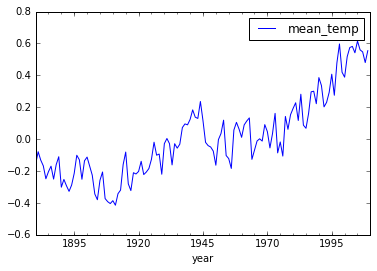

In [47]:
full_globe_temp.plot()

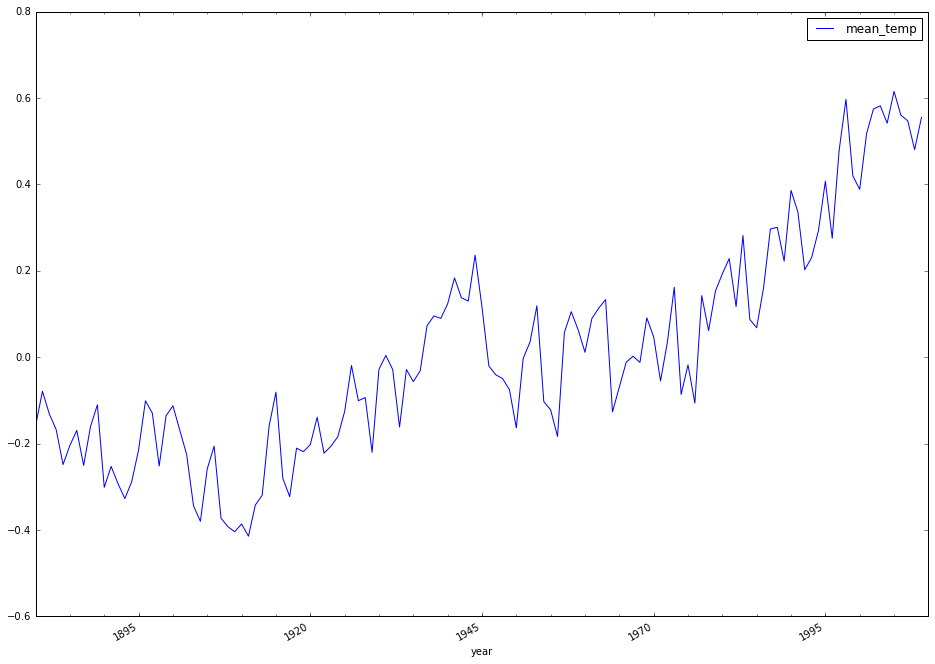

In [48]:
full_globe_temp.plot(subplots=True, figsize=(16, 12));

In [49]:
giss_temp.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34.0,-27.0,-22.0,-30.0,-16.0,-24.0,-19.0,-12.0,-20.0,-19.0,-16.0,-21.0
1881,-13.0,-16.0,-2.0,-3.0,-3.0,-27.0,-12.0,-8.0,-18.0,-23.0,-28.0,-18.0
1882,3.0,4.0,-2.0,-24.0,-20.0,-32.0,-27.0,-11.0,-11.0,-25.0,-25.0,-37.0
1883,-38.0,-38.0,-12.0,-20.0,-20.0,-8.0,-3.0,-13.0,-19.0,-19.0,-28.0,-21.0
1884,-20.0,-14.0,-31.0,-36.0,-33.0,-36.0,-31.0,-24.0,-29.0,-25.0,-29.0,-25.0


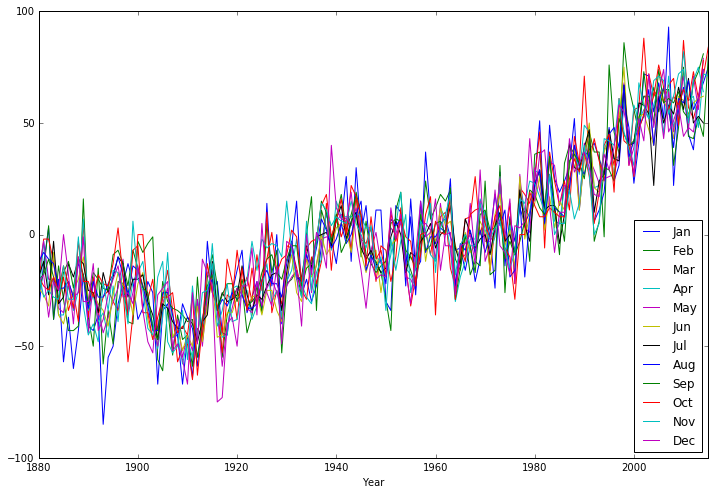

In [50]:
giss_temp.plot(figsize=LARGE_FIGSIZE)

### Showing distributions information

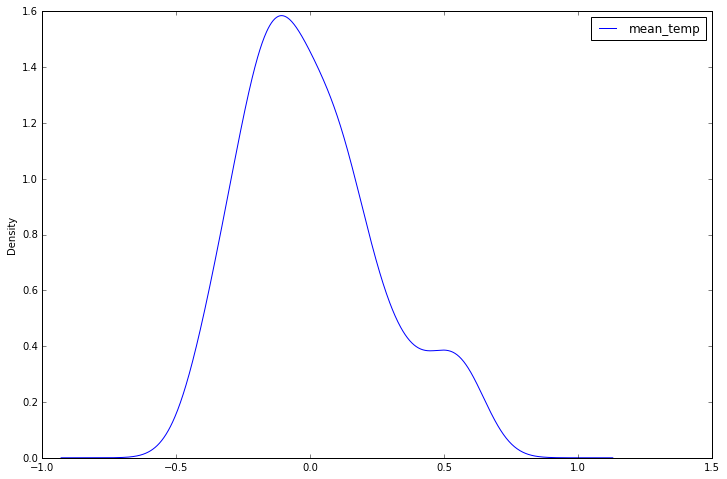

In [51]:
# Distributions of mean sean level globally and per hemisphere?
full_globe_temp.plot(kind="kde", figsize=(12, 8)) #kind specifies type of chart 
                                                 #Kernel Density Estimation plot (KDE)

In [ ]:
full_globe_temp.plot?

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


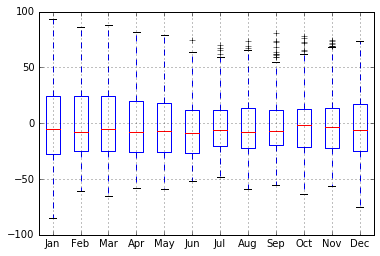

In [53]:
# Distributions of temperature in each month since 1880
giss_temp.boxplot();

## 5. Statistical analysis

### Descriptive statistics

Let's go back to the dataframe version of the GISS temperature dataset temporarily to analyze anomalies month per month. Like most functions on a dataframe, stats functions are computed column per column. They also ignore missing values:

In [54]:
giss_temp.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34.0,-27.0,-22.0,-30.0,-16.0,-24.0,-19.0,-12.0,-20.0,-19.0,-16.0,-21.0
1881,-13.0,-16.0,-2.0,-3.0,-3.0,-27.0,-12.0,-8.0,-18.0,-23.0,-28.0,-18.0
1882,3.0,4.0,-2.0,-24.0,-20.0,-32.0,-27.0,-11.0,-11.0,-25.0,-25.0,-37.0
1883,-38.0,-38.0,-12.0,-20.0,-20.0,-8.0,-3.0,-13.0,-19.0,-19.0,-28.0,-21.0
1884,-20.0,-14.0,-31.0,-36.0,-33.0,-36.0,-31.0,-24.0,-29.0,-25.0,-29.0,-25.0


In [55]:
monthly_averages = giss_temp.mean() #applies column by column by default
monthly_averages

Jan   -1.411765
Feb   -0.161765
Mar    1.294118
Apr   -0.823529
May   -2.051852
Jun   -3.237037
Jul   -0.688889
Aug   -0.622222
Sep    0.755556
Oct    1.333333
Nov    0.148148
Dec   -2.274074
dtype: float32

It is possible to apply stats functions across rows instead of columns using the `axis` keyword (just like in NumPy).

In [56]:
yearly_averages = giss_temp.mean(axis=1) #averages by row 
yearly_averages

Year
1880   -21.666666
1881   -14.250000
1882   -17.250000
1883   -19.916666
1884   -27.750000
1885   -26.083334
1886   -25.250000
1887   -32.416668
          ...    
2008    48.916668
2009    59.166668
2010    66.166664
2011    54.666668
2012    57.250000
2013    60.250000
2014    68.083336
2015    77.500000
dtype: float32

`describe` provides many descriptive stats computed at once:

In [57]:
print(giss_temp.describe())
print(giss_temp.median())

              Jan         Feb         Mar         Apr         May         Jun  \
count  136.000000  136.000000  136.000000  136.000000  135.000000  135.000000   
mean    -1.411765   -0.161765    1.294118   -0.823529   -2.051852   -3.237037   
std     35.586403   35.128599   34.542751   32.822504   31.527841   31.023633   
min    -85.000000  -61.000000  -65.000000  -58.000000  -59.000000  -52.000000   
25%    -27.250000  -24.500000  -25.000000  -25.500000  -25.500000  -27.000000   
50%     -5.000000   -7.500000   -5.500000   -7.500000   -7.000000   -9.000000   
75%     24.000000   24.000000   24.000000   20.250000   18.000000   12.000000   
max     93.000000   86.000000   88.000000   82.000000   79.000000   75.000000   

              Jul         Aug         Sep         Oct         Nov         Dec  
count  135.000000  135.000000  135.000000  135.000000  135.000000  135.000000  
mean    -0.688889   -0.622222    0.755556    1.333333    0.148148   -2.274074  
std     28.627423   29.487632 

### Describing categorical series

Let's look at our `local_sea_level_stations` dataset some more:

In [61]:
local_sea_level_stations.describe() ##will only do float variables. must do categorical separately

,ID,Lat,Lon,GLOSS ID,Coastline,Station
count,1450.000000,1450.000000,1450.000000,281.000000,1450.000000,1450.000000
mean,1055.917931,28.626383,23.354176,165.327402,528.527586,86.400690
std,645.859493,30.419017,92.316522,95.313053,312.256086,120.611498
min,1.000000,-77.850000,-179.367000,3.000000,10.000000,1.000000
25%,511.500000,13.571000,-63.508000,87.000000,220.000000,12.000000
50%,1008.000000,35.667000,15.144000,154.000000,641.000000,41.000000
75%,1602.250000,49.258500,118.517000,242.000000,821.000000,101.000000
max,2286.000000,82.490000,179.217000,351.000000,999.000000,725.000000


`.describe()` only displays information about continuous `Series`. What about categorical ones?

In [62]:
local_sea_level_stations.columns

Index(['Station Name', 'ID', 'Lat', 'Lon', 'GLOSS ID', 'Country', 'Date',
       'Coastline', 'Station'],
      dtype='object')

In [63]:
local_sea_level_stations["Country"]

0       ALA
1       ALA
2       ALA
3       ALA
4       ASM
5       ATA
6       ATA
7       ATA
       ... 
1442    VNM
1443    VNM
1444    VNM
1445    VIR
1446    VIR
1447    VIR
1448    VIR
1449    YEM
Name: Country, dtype: object

In [64]:
local_sea_level_stations["Country"].describe()

count     1450
unique     136
top        USA
freq       165
Name: Country, dtype: object

In [65]:
# List of unique values:
local_sea_level_stations["Country"].unique()

array(['ALA', 'ASM', 'ATA', 'ARG', 'AUS', 'BHS', 'BHR', 'BGD', 'BEL',
       'BMU', 'BRA', 'IOT', 'BGR', 'CAN', 'CPV', 'CYM', 'CHL', 'CHN',
       'CCK', 'COL', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP',
       'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'EST', 'FLK', 'FRO', 'FJI',
       'FIN', 'FRA', 'GUF', 'PYF', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC',
       'GRD', 'GLP', 'GUM', 'GTM', 'HTI', 'HND', 'HKG', 'ISL', 'IND',
       'IDN', 'IRN', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'KEN', 'KIR', 'PRK', 'KOR', 'LVA', 'LTU', 'MAC', 'MDG', 'MYS',
       'MDV', 'MLT', 'MHL', 'MTQ', 'MUS', 'MYT', 'MEX', 'FSM', 'MCO',
       'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NLD', 'NCL', 'NZL',
       'NGA', 'NFK', 'MNP', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG',
       'PER', 'PHL', 'POL', 'PRT', 'PRI', 'REU', 'ROU', 'RUS', 'SHN',
       'WSM', 'SEN', 'SYC', 'SGP', 'SVN', 'SLB', 'ZAF', 'ESP', 'SDN',
       'SJM', 'SWE', 'TWN', 'TZA', 'THA', 'TON', 'TTO', 'TUR', 'TUV',
       'UKR', 'GBR',

In [66]:
local_sea_level_stations["Country"].value_counts() #gives you freq breakdowns by the variable

USA    165
JPN    139
RUS     86
CAN     82
AUS     81
GBR     68
ESP     61
ITA     44
      ... 
MAR      1
IRN      1
GIB      1
MNE      1
MTQ      1
FRO      1
COG      1
GUF      1
Name: Country, dtype: int64

# Demo Part 2 (Homework 1)

In [69]:
%cd ~/Projects/Course Work/INFO 511 - Analytics/Homework 1/

C:\Users\sgille3\Projects\Course Work\INFO 511 - Analytics\Homework 1


In [70]:
#read in Emory Data
emory_main = pd.read_excel('Emory/main.xls', sheetname='EMORY_ORTHO_CO_MANAGE_MAIN')
emory_main = emory_main.set_index('RecordId')

emory_comorbid = pd.read_excel('Emory/comorbid.xls', sheetname='EMORY_ORTHO_CO_MANAGE_COMORBID')
emory_comorbid = emory_comorbid.set_index('RecordId')

emory_complic = pd.read_excel('Emory/complic.xls', sheetname='EMORY_ORTHO_CO_MANAGE_COMPL')
emory_complic = emory_complic.set_index('RecordId')

emory_px = pd.read_excel('Emory/px.xls', sheetname='EMORY_ORTHO_CO_MANAGE_PX')
emory_px = emory_px.set_index('RecordId')

emory_readmit = pd.read_excel('Emory/readmit.xls', sheetname='EMORY_ORTHO_CO_MANAGE_READMIT')
emory_readmit = emory_readmit.set_index('RecordId')

emory_safety = pd.read_excel('Emory/safety.xls', sheetname='EMORY_ORTHO_CO_MANAGE_SAFETY')
emory_safety = emory_safety.set_index('RecordId')

#read in Midtown Data
midtown_main = pd.read_excel('Midtown/midtown_main.xls', sheetname='QUERY_FOR_TBLABSTRACT')
midtown_main = midtown_main.set_index('RecordId')

midtown_comorbid = pd.read_excel('Midtown/midtown_comorbid.xls', sheetname='QUERY6_FOR_QUERY_FOR_TBLABSTRAC')
midtown_comorbid = midtown_comorbid.set_index('RecordId')

midtown_complic = pd.read_excel('Midtown/midtown_compl.xls', sheetname='QUERY2_FOR_QUERY_FOR_TBLABSTRAC')
midtown_complic = midtown_complic.set_index('RecordId')

midtown_px = pd.read_excel('Midtown/midtown_px.xls', sheetname='QUERY1_FOR_QUERY_FOR_TBLABSTRAC')
midtown_px = midtown_px.set_index('RecordId')

midtown_readmit = pd.read_excel('Midtown/midtown_readmit.xls', sheetname='QUERY5_FOR_QUERY_FOR_TBLABSTRAC')
midtown_readmit = midtown_readmit.set_index('RecordId')

midtown_safety = pd.read_excel('Midtown/midtown_safety.xls', sheetname='QUERY3_FOR_QUERY_FOR_TBLABSTRAC')
midtown_safety = midtown_safety.set_index('RecordId')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [72]:
#investigate variables for Emory datasets (vars same in Midtown data)
print(emory_main.columns)
print(emory_comorbid.columns)
print(emory_complic.columns)
print(emory_px.columns)
print(emory_readmit.columns)
print(emory_safety.columns)

Index(['DatabaseId', 'MedicareId', 'AdmissionDate', 'AdmissionSourceCode',
       'Age', 'SexCode', 'RaceCode', 'PrimaryPayerCode', 'SecondaryPayerCode',
       'AttestingPhysCode', 'DeathFlag', 'EarlyDeathFlag', 'TotalCost', 'LOS',
       'ROM', 'SOI', 'AdmissionSourceID', 'msdrgcode', 'AdmitSOI', 'AdmitROM'],
      dtype='object')
Index(['DatabaseId', 'MedicareId', 'ComorbidityCode', 'Description'], dtype='object')
Index(['DatabaseId', 'MedicareId', 'ComplicationCode', 'Description'], dtype='object')
Index(['DatabaseId', 'MedicareId', 'SeqNo', 'ProcedureCode', 'ProcedureDate',
       'Procedure_Physician_Code', 'Procedure_Specialty_Code',
       'Procedure_Physician_Code_Scrambl'],
      dtype='object')
Index(['DaysToReadmit', 'RelatedReadmitFlag', 'ChemotherapyFlag',
       'RehabilitationFlag', 'DeathFlag', 'RadiationTherapyFlag',
       'DialysisFlag', 'DeliveryBirthFlag', 'PsychAlcoholDrugFlag'],
      dtype='object')
Index(['DatabaseId', 'MedicareId', 'Code', 'Description', 'Quo

In [73]:
#specify variables to keep
emory_main_final = emory_main[['Age', 'RaceCode', 'SexCode', 'SOI']]
emory_px_final = emory_px.loc[emory_px.ProcedureCode == 8451, ['ProcedureCode']]
emory_readmit_final = emory_readmit[['DaysToReadmit']]
emory_safety_final = emory_safety.loc[emory_safety.Description=='Postoperative Hip Fracture', \
                                       ['Description']]

midtown_main_final = midtown_main[['Age', 'RaceCode', 'SexCode', 'SOI']]
midtown_px_final = midtown_px.loc[midtown_px.ProcedureCode == 8451, ['ProcedureCode']]
midtown_readmit_final = midtown_readmit[['DaysToReadmit']]
midtown_safety_final = midtown_safety.loc[midtown_safety.Description=='Postoperative Hip Fracture', \
                                       ['Description']]

In [74]:
#concatenate Emory and Midtown separately
emory_df=[emory_main_final,emory_px_final,emory_readmit_final,emory_safety_final]
full_emory_df = pd.concat(emory_df)
#print(full_emory_df.describe())

midtown_df=[midtown_main_final,midtown_px_final,midtown_readmit_final,midtown_safety_final]
full_midtown_df = pd.concat(midtown_df)
#print(full_midtown_df.describe())

#obtain full dataset
all_df=[full_emory_df,full_midtown_df]
final_df = pd.concat(all_df,keys=['Emory','Midtown'])

In [75]:
#continuous data summaries
cont_df = final_df[['Age','SOI','DaysToReadmit']]
print(cont_df.ix['Emory'].describe().transpose())
print(cont_df.ix['Midtown'].describe().transpose())

                count        mean         std    min    25%    50%    75%  \
Age            9572.0  713.904513  191.588177  160.0  596.0  730.0  846.0   
SOI            8938.0    1.939696    0.836165    0.0    1.0    2.0    2.0   
DaysToReadmit   777.0    7.190476    8.843704    0.0    0.0    3.0   13.0   

                  max  
Age            1262.0  
SOI               4.0  
DaysToReadmit    30.0  
                count        mean         std    min    25%    50%    75%  \
Age            3717.0  679.907452  211.343596  109.0  549.0  699.0  828.0   
SOI            2862.0    1.993361    0.842939    1.0    1.0    2.0    3.0   
DaysToReadmit   229.0   13.781659    7.948597    0.0    7.0   13.0   20.0   

                  max  
Age            1204.0  
SOI               4.0  
DaysToReadmit    30.0  


In [78]:
#categorical data summaries
cat_df = final_df[['RaceCode','SexCode', 'ProcedureCode', 'Description']]
print(cat_df.ix['Emory'].RaceCode.value_counts())
print(cat_df.ix['Emory'].SexCode.value_counts())
print(cat_df.ix['Emory'].ProcedureCode.value_counts())
print(cat_df.ix['Emory'].Description.value_counts())

print(cat_df.ix['Midtown'].RaceCode.value_counts())
print(cat_df.ix['Midtown'].SexCode.value_counts())
print(cat_df.ix['Midtown'].ProcedureCode.value_counts())
print(cat_df.ix['Midtown'].Description.value_counts())

1.0    6922
2.0    1885
6.0     670
3.0      95
Name: RaceCode, dtype: int64
2.0    5112
1.0    4460
Name: SexCode, dtype: int64
8451.0    1025
Name: ProcedureCode, dtype: int64
Postoperative Hip Fracture    365
Name: Description, dtype: int64
1.0    2050
2.0    1453
6.0     214
Name: RaceCode, dtype: int64
2.0    1956
1.0    1761
Name: SexCode, dtype: int64
8451.0    330
Name: ProcedureCode, dtype: int64
Postoperative Hip Fracture    159
Name: Description, dtype: int64
